#JAX transform functions
##grad() 
Differentation can be:

- manual
- symbolic
- numeric
- automatic! ❤️

In [16]:
import jax.numpy as jnp
import numpy as np
from jax import jit, grad
from jax import random
import matplotlib.pyplot as plt

In [17]:
# First example (automatic diff)

def sum_simple(x):  #  simpler example
    return jnp.sum(x**2)

x = jnp.arange(3.)
print(x)
loss = sum_simple  # rename it to give it some semantics

# By default grad calculates the derivative of a fn w.r.t. 1st parameter!
# Here we bundled inputs into a 1st param so it doesn't matter.
grad_loss = grad(loss)

print(grad_loss(x))

[0. 1. 2.]
[0. 2. 4.]


In [18]:
def sum_logistic(x):  
    return jnp.sum(1.0 / (1.0 + jnp.exp(-x)))  #little complex function

x = jnp.arange(3.)
print(x)
loss = sum_logistic  


grad_loss = grad(loss)

print(grad_loss(x))

[0. 1. 2.]
[0.25       0.19661194 0.10499357]


In [19]:
# Simple helper visualization function
def visualize_fn(fn, l=-10, r=10, n=1000):
    x = np.linspace(l, r, num=n)
    y = fn(x)
    plt.plot(x, y); plt.show()

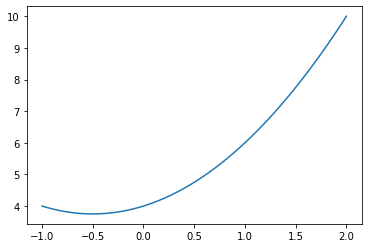

6.0 3.0 2.0 0.0


In [20]:
# Second example (automatic diff) Higher order derivatives

x = 1.  # example input

f = lambda x: x**2 + x + 4  # simple 2nd order polynomial fn
visualize_fn(f, l=-1, r=2, n=100)

dfdx = grad(f)  # 2*x + 1
d2fdx = grad(dfdx)  # 2
d3fdx = grad(d2fdx)  # 0

print(f(x), dfdx(x), d2fdx(x), d3fdx(x))

# Note1: Closer to math! 
# Note2: More powerful compared to .backward() (PyTorch syntax)

In [24]:
# 3rd example (automatic diff)  derivatives 2 arguments
#argnums=(1)

x = 1.  # example input
y = 1.

f = lambda x,y: x**2 + x + 4 + y**2

dfdx = grad(f, argnums=(1))  # 2*x + 1   
d2fdx = grad(dfdx)  # 2
d3fdx = grad(d2fdx)  # 0

print(f(x,y), dfdx(x,y), d2fdx(x,y), d3fdx(x,y))
# print(f(x,y), dfdx(x,y))

# Note1: Closer to math! 
# Note2: More powerful compared to .backward() (PyTorch syntax)

7.0 2.0 0.0 0.0
